## Individual assignement DMA Laura Zecca 


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [5]:
regusers_df = pd.read_csv('/Users/behemoth/Downloads/DMA individual assignement/regusers.tsv',sep = '\t',header = 0)
products_df = pd.read_csv('/Users/behemoth/Downloads/DMA individual assignement/products.tsv',
                         sep = "\s+",
                         dtype = {'id' : str},
                         encoding = 'utf-8'
                       )

In [6]:
# Drop rows where 'SWID' is NaN (missing)
regusers_df = regusers_df.dropna(subset=['SWID'])

In [7]:
print(f'The products data set has {regusers_df.shape[0]} rows and {regusers_df.shape[1]} columns')
regusers_df

The products data set has 38453 rows and 3 columns


,SWID,BIRTH_DT,GENDER_CD
0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,8-Apr-84,F
1,00071AA7-86D2-4EB9-871A-A786D27EB9BA,7-Feb-88,F
2,00071B7D-31AF-4D85-871B-7D31AFFD852E,22-Oct-64,F
3,0007967E-F188-4598-9C7C-E64390482CFB,1-Jun-66,M
4,000B90B2-92DC-4A7A-8B90-B292DC9A7A71,13-Jun-84,M
...,...,...,...
38448,FFF59F9D-1D51-4AE7-B414-2F141F05D4B4,10-Aug-75,M
38449,FFF62831-49DE-4AD7-AB7B-3A3621CD9589,10-Oct-85,M
38450,FFF69D73-CE85-4BD6-B10F-9F9F25CD7A74,19-Apr-87,M
38451,FFF9E6CB-D3A2-455F-B5CF-6B8EC4E80ABE,21-Mar-53,U


In [8]:
regusers_df['SWID'].nunique()


38453

In [9]:
products_df.head(16)

,url,category,id
/,home,page,1000
/video/1001,video,review,1001
/video/1002,video,review,1002
/video/1003,video,review,1003
/reco/2001,celebrity,recommendation,2001
/reco/2002,celebrity,recommendation,2002
/review/3001,customer,review,3001
/review/3002,customer,review,3002
/review/3003,customer,review,3003
/review/3004,customer,review,3004


In [10]:
## Rearranging data
NanIndex = pd.isna(products_df['id'])
products_df.loc[NanIndex,['id']] = products_df.loc[NanIndex,['category']].values
products_df.loc[NanIndex,['category']] = products_df.loc[NanIndex,['url']].values
products_df.loc[~NanIndex,['category']] = products_df.loc[~NanIndex,['url']].values + " " + \
                                            products_df.loc[~NanIndex,['category']].values

products_df['url'] = products_df.index
products_df['id'] = products_df['id'].astype(str)
products_df.set_index('id', drop = True, inplace = True)
products_df

,url,category
id,,
1000,/,home page
1001,/video/1001,video review
1002,/video/1002,video review
1003,/video/1003,video review
2001,/reco/2001,celebrity recommendation
2002,/reco/2002,celebrity recommendation
3001,/review/3001,customer review
3002,/review/3002,customer review
3003,/review/3003,customer review


In order to be able to merge the two we add a new url column by adding the url in front of the category. 

In [11]:
products_df['full_url'] = 'http://www.RL.com' + products_df['url']
products_df.head()

,url,category,full_url
id,,,
1000,/,home page,http://www.RL.com/
1001,/video/1001,video review,http://www.RL.com/video/1001
1002,/video/1002,video review,http://www.RL.com/video/1002
1003,/video/1003,video review,http://www.RL.com/video/1003
2001,/reco/2001,celebrity recommendation,http://www.RL.com/reco/2001


In [12]:
clickstream = pd.read_csv('/Users/behemoth/Downloads/DMA individual assignement/clickstream-feed-generated.tsv', sep = "|",
                            names = [ 'clickstream_id',
                                     'timestamp',
                                     'IP_address',
                                     'url',
                                     'is_purchased',
                                     'is_page_errored',
                                     'user_session_id',
                                     'city',
                                     'state',
                                     'country' ],
                            parse_dates = ['timestamp'],
                            infer_datetime_format = True,
                            dayfirst = True,
                            encoding = 'utf-8'
                       )
clickstream

,clickstream_id,timestamp,IP_address,url,is_purchased,is_page_errored,user_session_id,city,state,country
0,1330588819,2012-03-01 00:00:19,147.222.227.200,http://www.RL.com/,0,0.000000,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa
1,1330588825,2012-03-01 00:00:25,99.49.96.163,http://www.RL.com/product/4004,0,1.000000,C9183A22-6E1D-4147-BDC9-D634FC957098,detroit,mi,usa
2,1330588827,2012-03-01 00:00:27,147.222.227.200,http://www.RL.com/,0,0.000000,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa
3,1330588857,2012-03-01 00:00:57,69.114.3.205,http://www.RL.com/product/4004,0,0.000000,F761B842-9DDA-42CC-9F28-A6359B6C7219,east northport,ny,usa
4,1330588859,2012-03-01 00:00:59,71.217.29.209,http://www.RL.com/review/3004,0,0.595960,6FE1CB72-95C9-47F9-A1CB-7295C927F916,tacoma,wa,usa
...,...,...,...,...,...,...,...,...,...,...
421261,1331881141,2012-03-15 23:59:01,74.240.132.6,http://www.RL.com/product/4004,0,0.000000,632959ED-DE61-43E4-A9BC-0F8E1AA6B070,slidell,la,usa
421262,1331881141,2012-03-15 23:59:01,74.240.132.6,http://www.RL.com/reco/2001,0,0.414141,632959ED-DE61-43E4-A9BC-0F8E1AA6B070,slidell,la,usa
421263,1331881165,2012-03-15 23:59:25,50.39.205.175,http://www.RL.com/,0,0.000000,E3E83074-A1DF-4745-87BA-97E3C64ECA00,portland,or,usa
421264,1331881171,2012-03-15 23:59:31,50.39.205.175,http://www.RL.com/reco/2001,0,0.717172,E3E83074-A1DF-4745-87BA-97E3C64ECA00,portland,or,usa


In [13]:
clickstream['user_session_id'].nunique()


16123

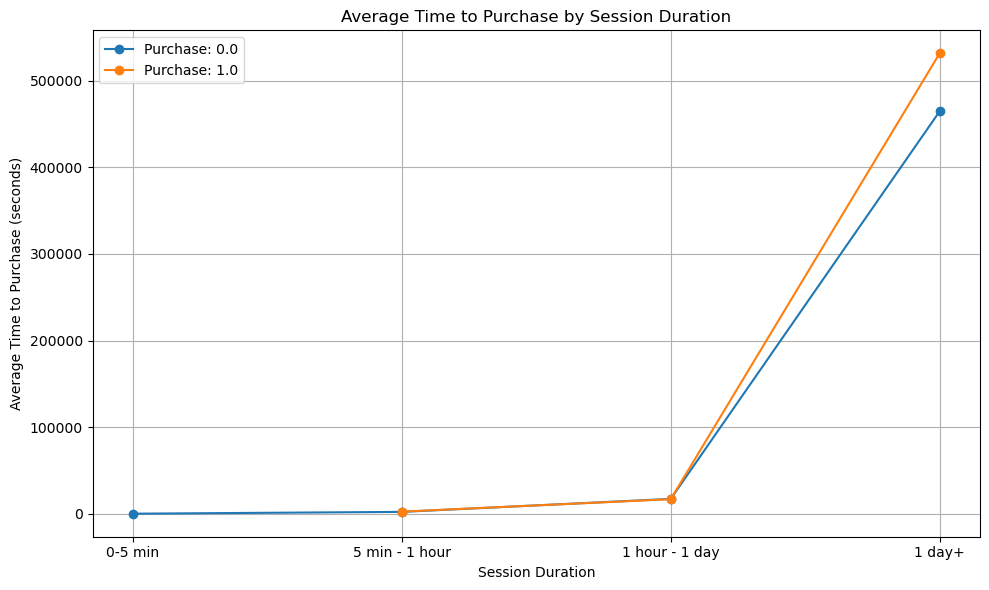

In [376]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamp to datetime format
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])

# Calculate session duration and purchase status for each user session
session_data = analysis_df.groupby('user_session_id').apply(lambda x: pd.Series({
    'session_duration': (x['timestamp'].max() - x['timestamp'].min()).total_seconds(),
    'is_purchased': 1 if 1 in x['is_purchased'].values else 0
}))

# Create bins for session duration
bins = [0, 300, 3600, 86400, float('inf')]  # 5 minutes, 1 hour, 1 day, inf
labels = ['0-5 min', '5 min - 1 hour', '1 hour - 1 day', '1 day+']

# Assign bins to session duration
session_data['duration_bin'] = pd.cut(session_data['session_duration'], bins=bins, labels=labels, right=False)

# Calculate average time to purchase for each duration bin and purchase status
avg_time_to_purchase = session_data.groupby(['duration_bin', 'is_purchased'])['session_duration'].mean().unstack()

# Create a line chart
plt.figure(figsize=(10, 6))
for column in avg_time_to_purchase.columns:
    plt.plot(avg_time_to_purchase.index, avg_time_to_purchase[column], marker='o', label=f'Purchase: {column}')

plt.xlabel('Session Duration')
plt.ylabel('Average Time to Purchase (seconds)')
plt.title('Average Time to Purchase by Session Duration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
something_df = pd.merge(left = clickstream, right = regusers_df, how = 'left', left_on = 'user_session_id', right_on = 'SWID')
checked_df = something_df.dropna(subset=['SWID'])
checked_df = pd.merge(left = checked_df, right = products_df, how = 'left', left_on = 'url', right_on = 'full_url')
checked_df.drop(['url_x', 'url_y'], axis = 1, inplace = True)
checked_df['timestamp'] = pd.to_datetime(checked_df['timestamp'])
checked_df.head()

,clickstream_id,timestamp,IP_address,is_purchased,is_page_errored,user_session_id,city,state,country,SWID,BIRTH_DT,GENDER_CD,category,full_url
0,1330588890,2012-03-01 00:01:30,68.5.184.133,0,0.000000,60C8049D-C1A2-41C2-B503-6C1200424C49,mission viejo,ca,usa,60C8049D-C1A2-41C2-B503-6C1200424C49,13-Jul-85,M,home page,http://www.RL.com/
1,1330588891,2012-03-01 00:01:31,68.5.184.133,0,0.919192,60C8049D-C1A2-41C2-B503-6C1200424C49,mission viejo,ca,usa,60C8049D-C1A2-41C2-B503-6C1200424C49,13-Jul-85,M,celebrity recommendation,http://www.RL.com/reco/2001
2,1330588939,2012-03-01 00:02:19,68.5.184.133,0,0.000000,60C8049D-C1A2-41C2-B503-6C1200424C49,mission viejo,ca,usa,60C8049D-C1A2-41C2-B503-6C1200424C49,13-Jul-85,M,home page,http://www.RL.com/
3,1330588948,2012-03-01 00:02:28,50.8.107.4,0,0.000000,A24EA63A-843F-4290-8B17-B7D16A204C96,denver,co,usa,A24EA63A-843F-4290-8B17-B7D16A204C96,23-Feb-80,U,home page,http://www.RL.com/
4,1330589013,2012-03-01 00:03:33,67.2.109.46,0,0.000000,6AF05C56-1AB3-4CB7-9584-7CDCB27BACFE,south jordan,ut,usa,6AF05C56-1AB3-4CB7-9584-7CDCB27BACFE,23-Jul-68,M,home page,http://www.RL.com/


Overall Average Clicks to Purchase: 18.84

Average Clicks to Purchase by Purchase Count Bin:
  purchase_bins  avg_clicks_to_purchase
0             0               26.298168
1             1               18.249310
2             2               15.655721
3             3               14.851515
4             4               15.192000
5            5+               16.223561


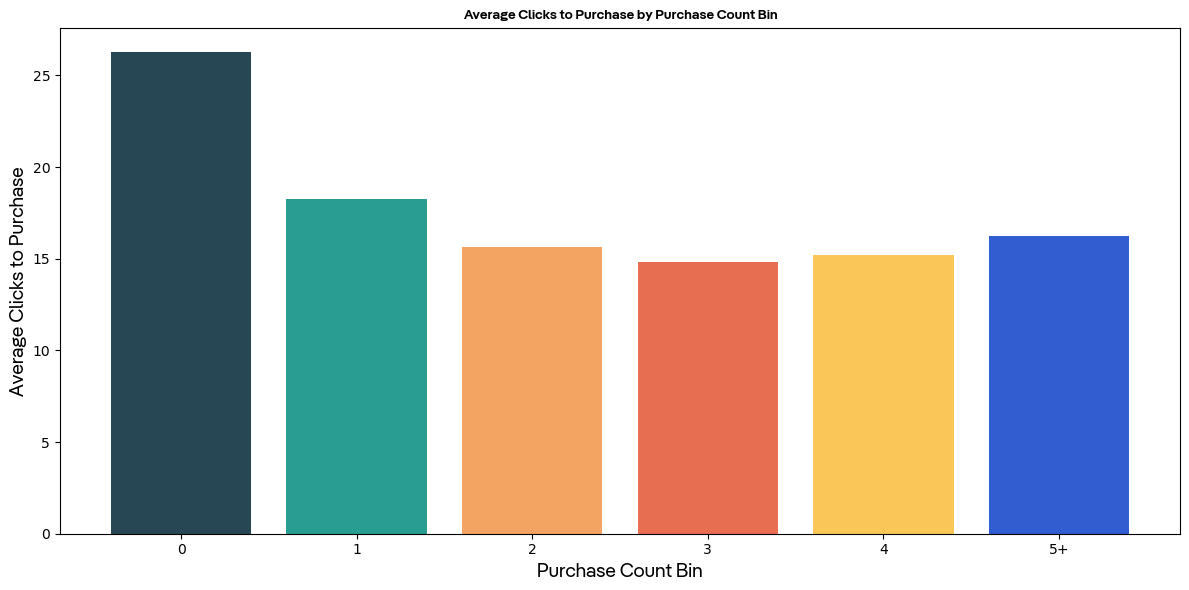

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Font paths and properties
font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_prop = font_manager.FontProperties(fname=font_path)
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"
font_bold_prop = font_manager.FontProperties(fname=font_bold_path)
colors = ['#284754', '#299D90', '#F4A462', '#E76E50', '#FAC658','#305DD0']

clickstream['timestamp'] = pd.to_datetime(clickstream['timestamp'])

# Group the data by user_session_id and calculate total clicks and purchases
session_data = clickstream.groupby('user_session_id').agg({
    'timestamp': 'count',
    'is_purchased': 'sum'
}).rename(columns={'timestamp': 'total_clicks', 'is_purchased': 'total_purchases'})
import matplotlib.pyplot as plt

# Filter out sessions where no purchase was made
filtered_session_data = session_data[session_data['total_purchases'] > 0]

# Create bins based on the number of purchases per session
filtered_session_data['purchase_bins'] = pd.cut(filtered_session_data['total_purchases'], bins=[0,1, 2, 3, 4, 5, float('inf')], labels=['0','1', '2', '3', '4', '5+'])

# Calculate the overall average clicks to purchase
avg_clicks_to_purchase = filtered_session_data['total_clicks'].sum() / filtered_session_data['total_purchases'].sum()
print(f"Overall Average Clicks to Purchase: {avg_clicks_to_purchase:.2f}")

# Calculate the average clicks to purchase for each purchase count bin
bin_averages = filtered_session_data.groupby('purchase_bins').apply(lambda x: x['total_clicks'].sum() / x['total_purchases'].sum()).reset_index()
bin_averages.rename(columns={0: 'avg_clicks_to_purchase'}, inplace=True)
print("\nAverage Clicks to Purchase by Purchase Count Bin:")
print(bin_averages)

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average clicks to purchase for each purchase count bin
ax1.bar(bin_averages['purchase_bins'], bin_averages['avg_clicks_to_purchase'], color=colors)
ax1.set_xlabel('Purchase Count Bin', fontsize=14, fontproperties=font_bold_prop)
ax1.set_ylabel('Average Clicks to Purchase', fontsize=14, fontproperties=font_bold_prop)
ax1.set_title('Average Clicks to Purchase by Purchase Count Bin',fontsize=14, fontproperties=font_prop)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('average_clicks_to_purchase.svg')
plt.show()

In [16]:
analysis_df = pd.merge(left = clickstream, right = products_df, how = 'left', left_on = 'url', right_on = 'full_url')
analysis_df.drop(['url_x', 'url_y'], axis = 1, inplace = True)
analysis_df

,clickstream_id,timestamp,IP_address,is_purchased,is_page_errored,user_session_id,city,state,country,category,full_url
0,1330588819,2012-03-01 00:00:19,147.222.227.200,0,0.000000,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/
1,1330588825,2012-03-01 00:00:25,99.49.96.163,0,1.000000,C9183A22-6E1D-4147-BDC9-D634FC957098,detroit,mi,usa,product,http://www.RL.com/product/4004
2,1330588827,2012-03-01 00:00:27,147.222.227.200,0,0.000000,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/
3,1330588857,2012-03-01 00:00:57,69.114.3.205,0,0.000000,F761B842-9DDA-42CC-9F28-A6359B6C7219,east northport,ny,usa,product,http://www.RL.com/product/4004
4,1330588859,2012-03-01 00:00:59,71.217.29.209,0,0.595960,6FE1CB72-95C9-47F9-A1CB-7295C927F916,tacoma,wa,usa,customer review,http://www.RL.com/review/3004
...,...,...,...,...,...,...,...,...,...,...,...
421261,1331881141,2012-03-15 23:59:01,74.240.132.6,0,0.000000,632959ED-DE61-43E4-A9BC-0F8E1AA6B070,slidell,la,usa,product,http://www.RL.com/product/4004
421262,1331881141,2012-03-15 23:59:01,74.240.132.6,0,0.414141,632959ED-DE61-43E4-A9BC-0F8E1AA6B070,slidell,la,usa,celebrity recommendation,http://www.RL.com/reco/2001
421263,1331881165,2012-03-15 23:59:25,50.39.205.175,0,0.000000,E3E83074-A1DF-4745-87BA-97E3C64ECA00,portland,or,usa,home page,http://www.RL.com/
421264,1331881171,2012-03-15 23:59:31,50.39.205.175,0,0.717172,E3E83074-A1DF-4745-87BA-97E3C64ECA00,portland,or,usa,celebrity recommendation,http://www.RL.com/reco/2001


In [17]:
analysis_df.sort_values(['user_session_id', 'timestamp'], ascending = [False, True])
analysis_df['visit_order'] = analysis_df.groupby('user_session_id').cumcount() + 1

In [18]:

# Data Cleaning
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])
analysis_df['is_purchased'] = analysis_df['is_purchased'].astype(int)
analysis_df['is_page_errored'] = analysis_df['is_page_errored'].astype(int)


In [19]:
analysis_df.head()
analysis_df_2 = analysis_df.copy()

## General data exploration

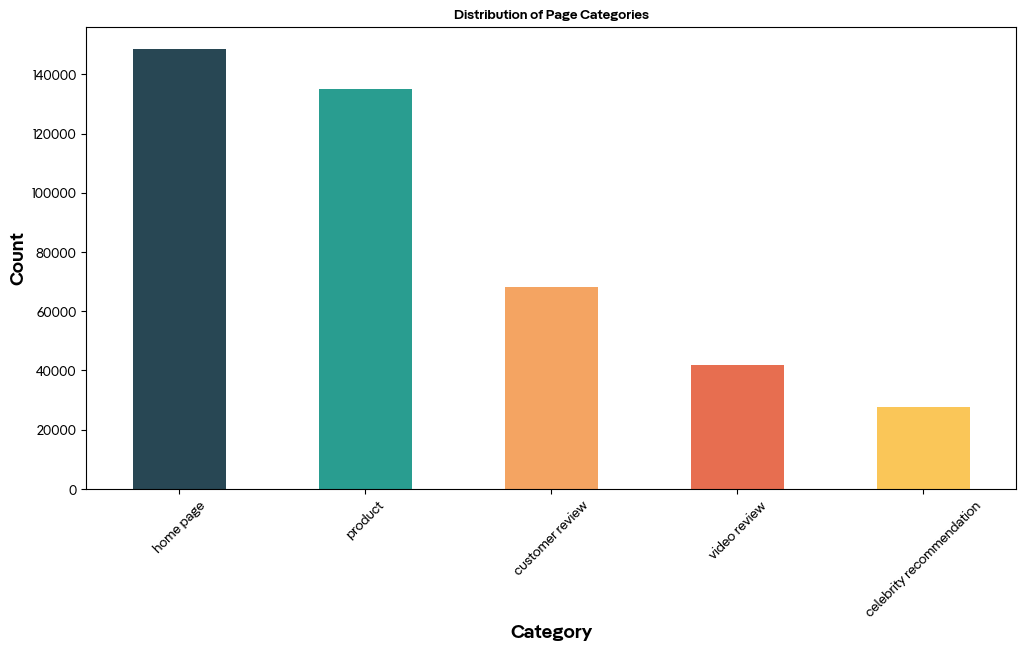

In [29]:
from matplotlib import font_manager

font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_prop = font_manager.FontProperties(fname=font_path)
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"
font_bold_prop = font_manager.FontProperties(fname=font_bold_path)
colors = ['#284754', '#299D90', '#F4A462','#E76E50', '#FAC658' ]
# Group the data by category and count occurrences
category_counts = analysis_df['category'].value_counts()

# Create a bar plot using Pandas and Matplotlib
category_counts.plot(kind='bar', figsize=(12, 6), color=colors)

# Rotate x-axis labels
plt.xticks(rotation=45, fontproperties=font_bold_prop)
plt.yticks(fontproperties=font_bold_prop)

# Add labels and title
plt.xlabel('Category', fontsize=14, fontproperties=font_prop)
plt.ylabel('Count', fontsize=14, fontproperties=font_prop)
plt.title('Distribution of Page Categories', fontsize=25, fontproperties=font_prop)

# Remove grid lines
plt.gca().grid(False)
plt.savefig('somethingsomething.svg', format='svg', bbox_inches='tight')


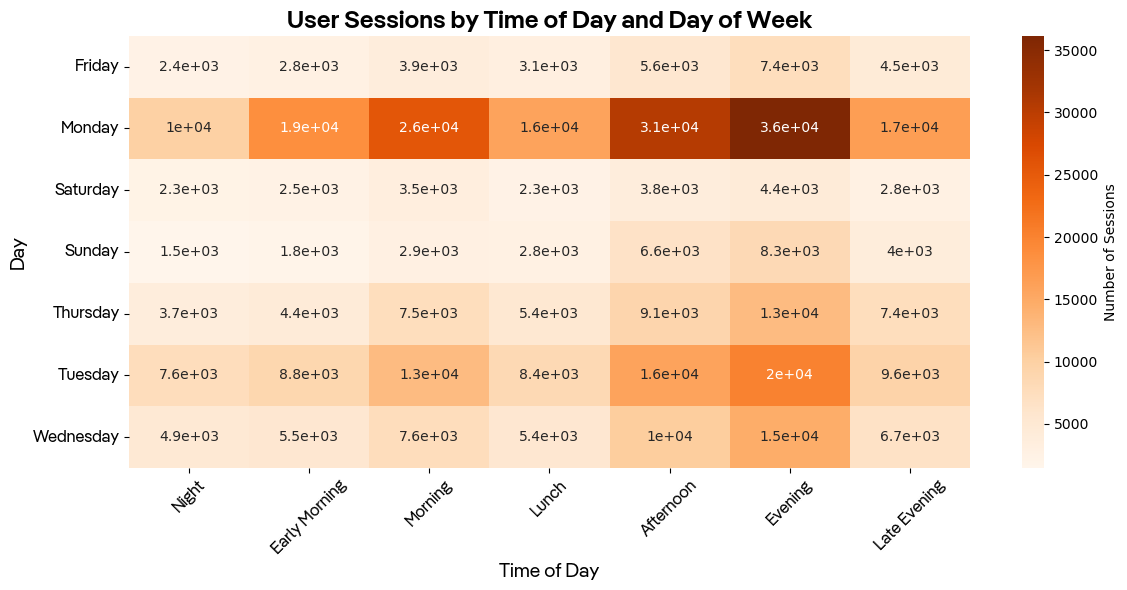

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
clickstream_df = clickstream.copy()
# Convert timestamp to datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import os

# Set the font paths
font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"
font_prop = font_manager.FontProperties(fname=font_path)
font_bold_prop = font_manager.FontProperties(fname=font_bold_path)
colors = ['#284754', '#299D90', '#F4A462', '#E76E50', '#FAC658']

# Set the font paths
font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"
font_prop = font_manager.FontProperties(fname=font_path)
font_bold_prop = font_manager.FontProperties(fname=font_bold_path)
colors = ['#284754', '#299D90', '#F4A462', '#E76E50', '#FAC658']

# Convert timestamp to datetime
clickstream_df['timestamp'] = pd.to_datetime(clickstream_df['timestamp'])

# Define the time bins
time_bins = [(0, 6), (6, 9), (9, 12), (12, 14), (14, 17), (17, 20), (20, 24)]
bin_labels = ['Night', 'Early Morning', 'Morning', 'Lunch', 'Afternoon', 'Evening', 'Late Evening']

# Group the timestamp into time bins
clickstream_df['time_bin'] = pd.cut(clickstream_df['timestamp'].dt.hour, bins=[b[0] for b in time_bins] + [24], labels=bin_labels, include_lowest=True)

# Group the timestamp into daily bins
clickstream_df['day_bin'] = clickstream_df['timestamp'].dt.day_name()

# Create a pivot table with counts of user sessions by time bin and day of week
session_counts = clickstream_df.groupby(['day_bin', 'time_bin']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(session_counts, annot=True, cmap='Oranges', cbar_kws={'label': 'Number of Sessions'})
plt.title("User Sessions by Time of Day and Day of Week", fontproperties=font_prop, fontsize=18)
plt.xlabel('Time of Day', fontproperties=font_bold_prop, fontsize=14)
plt.ylabel('Day', fontproperties=font_bold_prop, fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontproperties=font_bold_prop, fontsize=12)
plt.yticks(fontproperties=font_bold_prop, fontsize=12)

# Remove grid lines
plt.gca().grid(False)

plt.tight_layout()
plt.savefig('heatmapdayofweek.svg', format='svg', bbox_inches='tight')

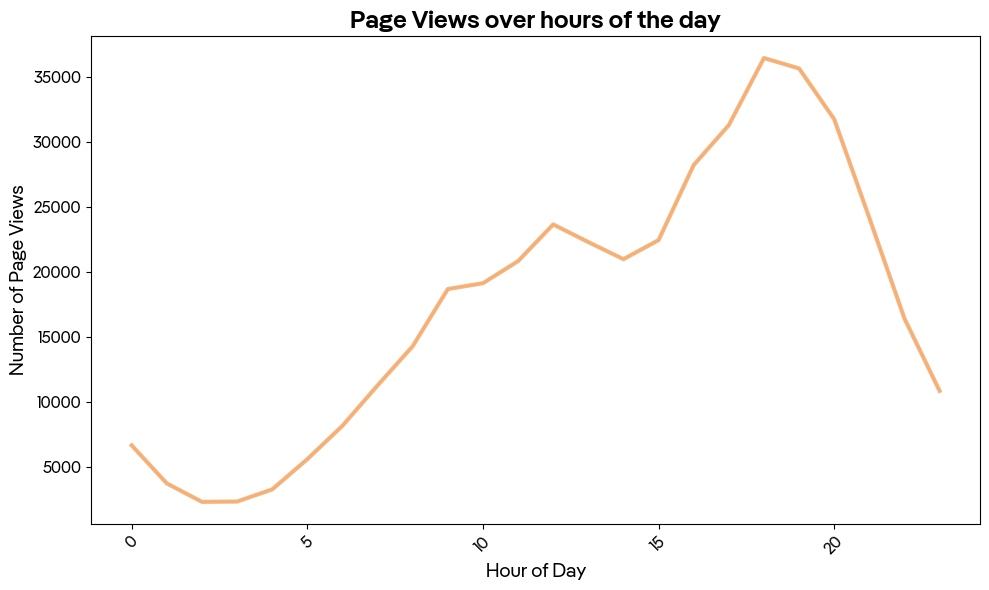

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import os

# Set the font paths
font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"
font_prop = font_manager.FontProperties(fname=font_path)
font_bold_prop = font_manager.FontProperties(fname=font_bold_path)
colors = ['#284754', '#299D90', '#F4A462', '#E76E50', '#FAC658']

# Convert timestamp to datetime
clickstream_df['timestamp'] = pd.to_datetime(clickstream_df['timestamp'])

# Group the data by hour and count page views
page_views = clickstream_df.groupby(clickstream_df['timestamp'].dt.hour).size()

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(page_views.index, page_views.values, color=colors[2], linewidth=3, alpha=0.8)

# Add wobbly effect to the line
x_values = page_views.index
y_values = page_views.values
ax.plot(x_values, y_values, color=colors[2], linewidth=1, alpha=0.5)
# Remove grid lines
ax.grid(False)

# Set labels and title
ax.set_xlabel('Hour of Day', fontproperties=font_bold_prop, fontsize=14)
ax.set_ylabel('Number of Page Views', fontproperties=font_bold_prop, fontsize=14)
ax.set_title('Page Views over hours of the day', fontproperties=font_prop, fontsize=18)

# Rotate x-axis labels
plt.xticks(rotation=45, fontproperties=font_bold_prop, fontsize=12)
plt.yticks(fontproperties=font_bold_prop, fontsize=12)

# Adjust spacing and show plot
plt.tight_layout()
plt.savefig('pageviewsovertime.svg', format='svg', bbox_inches='tight')

# Identifying the bump in reviews 

In [ ]:
import pandas as pd
from shapley import ShapleyAttributions

# Prepare your data
data = [
    {'journey_id': 1, 'touchpoints': ['Celebrity', 'Customer', 'Video'], 'conversion': 1},
    {'journey_id': 2, 'touchpoints': ['Celebrity', 'Video'], 'conversion': 1},
    {'journey_id': 3, 'touchpoints': ['Customer', 'Celebrity'], 'conversion': 1},
    {'journey_id': 4, 'touchpoints': ['Video'], 'conversion': 1},
    {'journey_id': 5, 'touchpoints': ['Celebrity', 'Customer', 'Video'], 'conversion': 0},
    # Add more customer journeys
]

# Create a DataFrame
df = pd.DataFrame(data)

# First Touch Attribution
def first_touch_attribution(df):
    first_touch_df = df.groupby('touchpoints').agg({'conversion': 'sum'}).reset_index()
    first_touch_df['attribution'] = first_touch_df['conversion'] / first_touch_df['conversion'].sum()
    return first_touch_df

# Last Touch Attribution
def last_touch_attribution(df):
    last_touch_df = df.groupby('touchpoints').agg({'conversion': 'sum'}).reset_index()
    last_touch_df['attribution'] = last_touch_df['conversion'] / last_touch_df['conversion'].sum()
    return last_touch_df

# Shapley Value Attribution
def shapley_value_attribution(df):
    shapley_attributions = ShapleyAttributions(df, 'touchpoints', 'conversion')
    shapley_df = shapley_attributions.attributed_values()
    shapley_df['attribution'] = shapley_df['attribution'] / shapley_df['attribution'].sum()
    return shapley_df

# Calculate attributions
first_touch_df = first_touch_attribution(df)
last_touch_df = last_touch_attribution(df)
shapley_df = shapley_value_attribution(df)

# Compare attributions
comparison_df = pd.concat([
    first_touch_df[['touchpoints', 'attribution']].rename(columns={'attribution': 'first_touch'}),
    last_touch_df[['touchpoints', 'attribution']].rename(columns={'attribution': 'last_touch'}),
    shapley_df[['touchpoints', 'attribution']].rename(columns={'attribution': 'shapley_value'})
], axis=1)

print("Attribution Comparison:")
print(comparison_df)

# First flow



In [49]:
## Function to add 2 minutes to purchase event
import datetime as dt
def add_two_mins(time_string):
    #the_time = dt.datetime.strptime(time_string, '%H:%M')
    new_time = time_string + dt.timedelta(minutes=2)
    return new_time.strftime('%H:%M:%S')

In [51]:
## Append purchase event to analysis_df
purchase_df = analysis_df[analysis_df['is_purchased'] == 1].copy()
purchase_df['timestamp'] = purchase_df['timestamp'].map(add_two_mins)
purchase_df['category'] = 'purchase'
analysis_df = pd.concat([analysis_df, purchase_df], axis = 0)
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])

### Data Processing
The sankey diagram will contain the following:
    
    Every website event of the user journey: the nodes of the chart will stand for all the website pages, from entrance 
    to the Nth event. Here, we’ll go up to the 10th event.
    
    The funnel of pages of every user: each time we see that a user visited a new page, we’ll link this page to his 
    previous page. The width of the links will increase as we observe more users completing the same sequence of in-app 
    events.
    
    Average time between two events: we’ll also compute the time between every event for each user, to be able to compute 
    the average time between each step of the funnel.
    
In order to do this the data must be processed, organized and cleansed to meet the sankey diagram structure.
The code from this section has been recycled from a [fantastic article](https://towardsdatascience.com/visualizing-in-app-user-journey-using-sankey-diagrams-in-python-8373a7bb2d22) by Nicolas Esnis explaining the use of sankey diagrams and their use for both app developers and marketers.


In [317]:
## Create initial DF from analysis_df
entances = analysis_df[['user_session_id', 'timestamp']].sort_values('timestamp').drop_duplicates('user_session_id')

In [318]:
## Add columns with inital ('entrance') event name/type
entances['event_name'] = 'flow_entry'
entances['event_type'] = 'flow_entry'
entances.rename(columns={'timestamp': 'time_event'}, inplace=True)

In [319]:
## Drop duplicates with new DF
data = analysis_df[['user_session_id', 'category', 'timestamp']].drop_duplicates()
data.rename(columns={'timestamp': 'time_event','category' : 'event_name'}, inplace=True)
data['event_type'] = 'in_app_action'

In [320]:
## Concatanate both DFs
data = pd.concat([data, entances[data.columns]])
data.sort_values(['user_session_id', 'event_type', 'time_event'], ascending = [True, True, True], inplace = True)
grouped = data.groupby('user_session_id')

In [321]:
## Function to get event time
def rank(x): return x['time_event'].rank(method='first').astype(int)

data["rank_event"] = grouped.apply(rank).reset_index(0, drop=True)

grouped = data.groupby('user_session_id')

In [322]:
## Function to get next event
def get_next_event(x): return x['event_name'].shift(-1)

data["next_event"] = grouped.apply(lambda x: get_next_event(x)).reset_index(0, drop=True)

grouped = data.groupby('user_session_id')

In [323]:
## Function to get time difference between events
def get_time_diff(x): return x['time_event'].shift(-1) - x['time_event']

data["time_to_next"] = grouped.apply(lambda x: get_time_diff(x)).reset_index(0, drop=True)

The data frame now has the user_session_id, the event_name and the time and type of that event, the rank (order) that event is, the next_event and the time to the next event. It is previewed below

In [324]:
## Preview DF
data.head()

,user_session_id,event_name,time_event,event_type,rank_event,next_event,time_to_next
319376,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,flow_entry,2012-03-12 20:42:30,flow_entry,1,celebrity recommendation,0 days 00:00:00
319376,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,celebrity recommendation,2012-03-12 20:42:30,in_app_action,2,customer review,0 days 00:00:11
319396,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,customer review,2012-03-12 20:42:41,in_app_action,3,product,0 days 00:00:16
319425,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,product,2012-03-12 20:42:57,in_app_action,4,customer review,0 days 00:00:00
319426,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,customer review,2012-03-12 20:42:57,in_app_action,5,product,0 days 00:01:24


In [326]:
purchase_sessions = data[data['event_name'].isin(['purchase', 'end_of_purchase'])]
purchase_sessions = purchase_sessions.groupby('user_session_id').apply(lambda x: x.iloc[-2:])

# Identify sessions that ended without a purchase
exit_sessions = data[~data['user_session_id'].isin(purchase_sessions['user_session_id'])]
exit_sessions = exit_sessions.groupby('user_session_id').tail(1)

# Add an 'exit' event to the exit_sessions DataFrame
exit_sessions['next_event'] = 'exit'
exit_sessions['time_to_next'] = pd.Timedelta(seconds=0)
exit_sessions['rank_event'] = exit_sessions['rank_event'] + 1

# Combine the purchase and exit sessions into a new DataFrame
new_data = pd.concat([purchase_sessions, exit_sessions])

,user_session_id,event_name,time_event,event_type,rank_event,next_event,time_to_next
"(0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D, 319425)",0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,purchase,2024-06-05 20:44:57,in_app_action,13,None,NaT
"(000C47AD-EBFC-CDB8-CF70-DC4C2ED5051B, 413820)",000C47AD-EBFC-CDB8-CF70-DC4C2ED5051B,purchase,2024-06-05 19:12:19,in_app_action,17,purchase,0 days 00:24:41
"(000C47AD-EBFC-CDB8-CF70-DC4C2ED5051B, 414711)",000C47AD-EBFC-CDB8-CF70-DC4C2ED5051B,purchase,2024-06-05 19:37:00,in_app_action,18,None,NaT
"(000E15BA-EB3E-14A6-4921-0E24C052821D, 313555)",000E15BA-EB3E-14A6-4921-0E24C052821D,purchase,2024-06-05 19:43:41,in_app_action,16,None,NaT
"(000EE247-7758-E6B7-68D3-ACE8445BCD43, 52771)",000EE247-7758-E6B7-68D3-ACE8445BCD43,purchase,2024-06-05 04:10:35,in_app_action,9,None,NaT
...,...,...,...,...,...,...,...
259232,FFE7704F-3A0C-4830-B6EE-9EC73B98807B,customer review,2012-03-12 08:01:48,in_app_action,10,exit,0 days 00:00:00
175892,FFF1BD4A-82B8-F6A6-C6D7-07914E229B02,customer review,2012-03-07 12:02:47,in_app_action,7,exit,0 days 00:00:00
184355,FFF3EEA6-1A7A-4BF6-8C8E-84BBC530AD34,product,2012-03-07 17:27:17,in_app_action,27,exit,0 days 00:00:00
227369,FFF47F68-28C7-4088-ADAE-BD09C695A448,video review,2012-03-09 20:31:38,in_app_action,10,exit,0 days 00:00:00


In [327]:
# Working on the nodes_dict
all_events = list(new_data.event_name.unique())

# Create a set of colors that you'd like to use in your plot.
palette = ['284754', '299D90', 'F4A462', 'E76E50', 'FAC658', '305DD0', '048C66']
#  Here, I passed the colors as HEX, but we need to pass it as RGB. This loop will convert from HEX to RGB:
for i, col in enumerate(palette):
    palette[i] = tuple(int(col[i:i+2], 16) for i in (0, 2, 4))

# Append a Seaborn complementary palette to your palette in case you did not provide enough colors to style every event
complementary_palette = sns.color_palette(
    "deep", len(all_events) - len(palette))
if len(complementary_palette) > 0:
    palette.extend(complementary_palette)

output = dict()
output.update({'nodes_dict': dict()})

i = 0
for rank_event in new_data.rank_event.unique(): # For each rank of event...
    # Create a new key equal to the rank...
    output['nodes_dict'].update(
        {rank_event: dict()}
    )
    
    # Look at all the events that were done at this step of the funnel...
    all_events_at_this_rank = new_data[new_data.rank_event ==
                                   rank_event].event_name.unique()
    
    # Read the colors for these events and store them in a list...
    rank_palette = []
    for event in all_events_at_this_rank:
        rank_palette.append(palette[list(all_events).index(event)])
    
    # Keep trace of the events' names, colors and indices.
    output['nodes_dict'][rank_event].update(
        {
            'sources': list(all_events_at_this_rank),
            'color': rank_palette,
            'sources_index': list(range(i, i+len(all_events_at_this_rank)))
        }
    )
    # Finally, increment by the length of this rank's available events to make sure next 
    #indices will not be chosen from existing ones
    i += len(output['nodes_dict'][rank_event]['sources_index'])

For every user’s sequence of events, we’ll need to:

1) Read in nodes_dict the unique source_index of every event in the sequence.

2) Likewise, read the source_index of each event’s next event (the target indices of rank N are retrieved from the source indices of rank N+1) and store it into a target_index variable.

3) Check if the combination of the source_index and the target_index is already a key of links_dict. If not, we’ll create it. If it is, we’ll increment the count of unique users, and add the time_to_next information. Later, by dividing the time_to_next by the count of unique users, we’ll have the average time from an event to another.

In [328]:
# Working on the links_dict
output.update({'links_dict': dict()})

# Group the DataFrame by user_id and rank_event
grouped = new_data.groupby(['user_session_id', 'rank_event'])

# Define a function to read the souces, targets, values and time from event to next_event:
def update_source_target(user):
    try:
        # user.name[0] is the user's user_id; user.name[1] is the rank of each action
        # 1st we retrieve the source and target's indices from nodes_dict
        source_index = output['nodes_dict'][user.name[1]]['sources_index'][output['nodes_dict']
                                                                           [user.name[1]]['sources'].\
                                                                           index(user['event_name'].values[0])]
        target_index = output['nodes_dict'][user.name[1] + 1]['sources_index'][output['nodes_dict']
                                                                               [user.name[1] + 1]['sources'].\
                                                                               index(user['next_event'].values[0])]

         # If this source is already in links_dict...
        if source_index in output['links_dict']:
            # ...and if this target is already associated to this source...
            if target_index in output['links_dict'][source_index]:
                # ...then we increment the count of users with this source/target pair by 1, 
                #and keep track of the time from source to target
                output['links_dict'][source_index][target_index]['unique_users'] += 1
                output['links_dict'][source_index][target_index]['avg_time_to_next'] += user['time_to_next'].values[0]
            # ...but if the target is not already associated to this source...
            else:
                # ...we create a new key for this target, for this source, and initiate it with 1 user 
                #and the time from source to target
                output['links_dict'][source_index].update({target_index:
                                                           dict(
                                                               {'unique_users': 1,
                                                                'avg_time_to_next': user['time_to_next'].values[0]}
                                                           )
                                                           })
        # ...but if this source isn't already available in the links_dict, we create its key 
        #and the key of this source's target, and we initiate it with 1 user and the time from source to target
        else:
            output['links_dict'].update({source_index: dict({target_index: dict(
                {'unique_users': 1, 'avg_time_to_next': user['time_to_next'].values[0]})})})
    except Exception as e:
        pass

# Apply the function to your grouped Pandas object:
grouped.apply(lambda user: update_source_target(user)) 

""


Before being able to plot our Sankey diagram, we’ll need to create the targets, sources, values, labels and colors lists from our dictionaries, that will be passed as parameters in the plotting function. This can be achieved easily by iterating over our nodes_dict and links_dict:

In [329]:
targets = []
sources = []
values = []
time_to_next = []

for source_key, source_value in output['links_dict'].items():
    for target_key, target_value in output['links_dict'][source_key].items():
        sources.append(source_key)
        targets.append(target_key)
        values.append(target_value['unique_users'])
        time_to_next.append(str(pd.to_timedelta(
            target_value['avg_time_to_next'] / target_value['unique_users'])).split('.')[0]) 
        # Split to remove the milliseconds information

labels = []
colors = []
for key, value in output['nodes_dict'].items():
    labels = labels + list(output['nodes_dict'][key]['sources'])
    colors = colors + list(output['nodes_dict'][key]['color'])

for idx, color in enumerate(colors):
    colors[idx] = "rgb" + str(color) + ""

### Visualising Snakey User Flow With Plotly



In [330]:
import plotly.graph_objects as go
import plotly.offline as py
import plotly.tools as tls
import plotly
import matplotlib.font_manager as fm
font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"

link_colors = ['rgba' + color[3:-1] + ', 0.5)' for color in colors]  # Assuming opacity 0.8

# Create a list for link colors based on source node colors
link_colors = [link_colors[source] for source in sources]
# Load the custom fonts
prop = fm.FontProperties(fname=font_path)
prop_bold = fm.FontProperties(fname=font_bold_path)
py.init_notebook_mode(connected = True)
fig = go.Figure(data = [go.Sankey(
    node = dict(
        thickness = 10,  # default is 20
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = colors
    ),
    visible = True,
    link=dict(
        source = sources,
        target = targets,
        value = values,
        label = time_to_next,
        hovertemplate = '%{value} unique users went from %{source.label} to %{target.label}.<br />' +
        '<br />It took them %{label} in average.<extra></extra>',
        color = link_colors
    ))])

fig.update_layout(title_text="Website User Flow", plot_bgcolor = 'white', autosize = False,
    width = 1500,
    height = 1000,
    font=dict(family=prop.get_name(), size=16),  # Changed label size to 16
    showlegend=True
    )

py.iplot(fig, filename = "test-graph")
import plotly.io as pio

pio.write_image(fig, "sankey_diagram.svg", format='svg')

### Plotly’s Sankey Data Structure


In [ ]:
## Function for actual transition states
from collections import defaultdict

def transition_count(trans_dict):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    trans_count = defaultdict(dict)

    for state in list_of_unique_channels:
        if state not in ['Purchase', 'Null']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]]))
                    trans_count[list(trans_dict)[col]] = state_prob

    return trans_count, list_of_unique_channels

In [ ]:
## Get transition_counts
trans_count = transition_count(trans_states)

In [ ]:
## Creat DF for analysis
path_count_df = pd.DataFrame.from_dict(trans_count[0], orient = 'index')
path_count_df.reset_index(inplace = True)
path_count_df.columns = ['path', 'count']
path_count_df[['source', 'target']] = path_count_df['path'].str.split('>', expand = True)
path_count_df.drop('path', axis =1, inplace = True)

Below the source and target pages are mapped to categorical values which are used by the plotly object to create the sankey flow.

In [ ]:
## Map page names to categorical values
source_codes = {'Start' : 0}
target_codes = {'customer review' : 1, 'home page' : 2, 'celebrity recommendation': 3, 'product' : 4, 'video review' : 5}

path_count_df['source_#'] = path_count_df['source']
path_count_df['source_#'] = path_count_df['source_#'].map(source_codes)
path_count_df['target_#'] = path_count_df['target']
path_count_df['target_#'] = path_count_df['target_#'].map(target_codes)

path_count_df = path_count_df[['source', 'target', 'source_#', 'target_#', 'count']]
path_count_df['path_name'] = path_count_df['source'] + ' -> ' + path_count_df['target']

The data frame below contains the source and target pages along with their categorical values that will be used in the sankey plot. The targets are either 'Null' representing a direct exit from the website and 'Purchase' which signifies that the user has completed a purchase. Naturally, there are many more 'Null' exits than there are purchases. 

In [ ]:
## Map page names to categorical values
source_codes = {'customer review' : 1, 'home page' : 2, 'celebrity recommendation': 3, 'product' : 4, 'video review' : 5}
target_codes = {'Purchase' : 6, 'Null' : 7}
purch_df = path_count_df.loc[(path_count_df['target'] == 'Purchase') | (path_count_df['target'] == 'Null')]
purch_df['source_#'] = purch_df['source'].map(source_codes)
purch_df['target_#'] = purch_df['target'].map(target_codes)
purch_df

This sankey diagram what the user flow from the last page, before a purchase or exit, is. Unsurprisingly the exits represented by 'Null' are significantly more probable than the purchases. Each of the flows may be highlighted in order to show the size of the flow from one state to another. They states (pages) on the left are ordered in decreasing size, where 'celebrity recommendation' has the largest outflow and 'product', at the bottom, has the smallest outflow.

In [ ]:
## Plotly Sankey
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label = ['', 'customer review', 'home page', 'celebrity recommendation' , 'product' ,'video review', \
               'Purchase', 'Null'],
      #color = purch_df['Color']
    ),
    link = dict(
      source = purch_df['source_#'].dropna(axis = 0, how = 'any'),
      target = purch_df['target_#'].dropna(axis=0, how = 'any'),
      value = purch_df['count'].dropna(axis = 0, how = 'any')#,
      #color = path_count_df['Link Color'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "Last Page Viewed Before Exit or Purchase",
    height = 772,
    font = dict(
      size = 10
    ),    
)

fig = dict(data = [data_trace], layout = layout)
py.iplot(fig, validate = False)

# Last purchase 

In [358]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import plotly.graph_objects as go

# Sample analysis_df for demonstration purposes
# Replace this with your actual analysis_df

# Function to add 2 minutes to purchase event
def add_two_mins(time):
    return time + timedelta(minutes=2)

# Append purchase event to analysis_df
purchase_df = analysis_df[analysis_df['is_purchased'] == 1].copy()
purchase_df['timestamp'] = purchase_df['timestamp'].map(add_two_mins)
purchase_df['category'] = 'purchase'
analysis_df = pd.concat([analysis_df, purchase_df], axis=0)
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])

# Data Processing
entrances = analysis_df[['user_session_id', 'timestamp']].sort_values('timestamp').drop_duplicates('user_session_id')
entrances['event_name'] = 'flow_entry'
entrances['event_type'] = 'flow_entry'
entrances.rename(columns={'timestamp': 'time_event'}, inplace=True)

data = analysis_df[['user_session_id', 'category', 'timestamp']].drop_duplicates()
data.rename(columns={'timestamp': 'time_event', 'category': 'event_name'}, inplace=True)
data['event_type'] = 'in_app_action'
data = pd.concat([data, entrances[data.columns]])
data.sort_values(['user_session_id', 'event_type', 'time_event'], ascending=[True, True, True], inplace=True)

grouped = data.groupby('user_session_id')

# Function to get event time
def rank(x): return x['time_event'].rank(method='first').astype(int)
data["rank_event"] = grouped.apply(rank).reset_index(0, drop=True)
grouped = data.groupby('user_session_id')

# Function to get next event
def get_next_event(x): return x['event_name'].shift(-1)
data["next_event"] = grouped.apply(lambda x: get_next_event(x)).reset_index(0, drop=True)

# Function to get time difference between events
def get_time_diff(x): return x['time_event'].shift(-1) - x['time_event']
data["time_to_next"] = grouped.apply(lambda x: get_time_diff(x)).reset_index(0, drop=True)

# Identify exits (where next_event is NaN)
data['next_event'].fillna('exit', inplace=True)

# Find the last event before purchase or exit
last_event_before_purchase_or_exit = data[data['next_event'].isin(['purchase', 'exit'])].copy()
last_event_before_purchase_or_exit = last_event_before_purchase_or_exit[~last_event_before_purchase_or_exit['event_name'].isin(['purchase', 'exit'])]

# Create a dataframe with user_session_id and the last event before purchase or exit
last_events = last_event_before_purchase_or_exit[['user_session_id', 'event_name', 'next_event', 'time_event']]
last_events.rename(columns={'event_name': 'last_event', 'next_event': 'exit_or_purchase'}, inplace=True)

# Display the resulting dataframe
last_events.head()


,user_session_id,last_event,exit_or_purchase,time_event
319552,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,product,purchase,2012-03-12 20:44:21
319743,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,home page,purchase,2012-03-12 20:46:44
319801,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,home page,purchase,2012-03-12 20:47:22
323119,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,product,exit,2012-03-12 21:30:46
329869,000B90B2-92DC-4A7A-8B90-B292DC9A7A71,home page,exit,2012-03-12 23:40:16


In [359]:
# Aggregate the data for Sankey diagram
sankey_df = last_events.groupby(['last_event', 'exit_or_purchase']).size().reset_index(name='count')

# Create lists of unique nodes and links
nodes = list(set(sankey_df['last_event'].unique()).union(set(sankey_df['exit_or_purchase'].unique())))
nodes_index = {node: i for i, node in enumerate(nodes)}

# Create the link data for Sankey
sankey_links = sankey_df.apply(lambda row: {
    'source': nodes_index[row['last_event']],
    'target': nodes_index[row['exit_or_purchase']],
    'value': row['count']
}, axis=1).tolist()

# Create the node data for Sankey
sankey_nodes = [{'name': node} for node in nodes]

# Display nodes and links for debugging
print(f"Nodes: {sankey_nodes}")
print(f"Links: {sankey_links}")


Nodes: [{'name': 'celebrity recommendation'}, {'name': 'customer review'}, {'name': 'purchase'}, {'name': 'exit'}, {'name': 'product'}, {'name': 'video review'}, {'name': 'home page'}]
Links: [{'source': 0, 'target': 3, 'value': 895}, {'source': 0, 'target': 2, 'value': 1403}, {'source': 1, 'target': 3, 'value': 2411}, {'source': 1, 'target': 2, 'value': 3848}, {'source': 6, 'target': 3, 'value': 5684}, {'source': 6, 'target': 2, 'value': 9885}, {'source': 4, 'target': 3, 'value': 3577}, {'source': 4, 'target': 2, 'value': 9159}, {'source': 5, 'target': 3, 'value': 1524}, {'source': 5, 'target': 2, 'value': 2434}]


In [369]:
# Aggregate the data for Sankey diagram
sankey_df = last_events.groupby(['last_event', 'exit_or_purchase']).size().reset_index(name='count')

# Create lists of unique nodes and links
nodes = list(set(sankey_df['last_event'].unique()).union(set(sankey_df['exit_or_purchase'].unique())))
nodes_index = {node: i for i, node in enumerate(nodes)}

# Create the link data for Sankey
sankey_links = sankey_df.apply(lambda row: {
    'source': nodes_index[row['last_event']],
    'target': nodes_index[row['exit_or_purchase']],
    'value': row['count']
}, axis=1).tolist()

# Create the node data for Sankey
sankey_nodes = [{'name': node} for node in nodes]

# Display nodes and links for debugging
print(f"Nodes: {sankey_nodes}")
print(f"Links: {sankey_links}")

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[node['name'] for node in sankey_nodes],
    ),
    link=dict(
        source=[link['source'] for link in sankey_links],
        target=[link['target'] for link in sankey_links],
        value=[link['value'] for link in sankey_links],
    )
)])

fig.update_layout(title_text="User Journey - Last Event Before Exit or Purchase", font_size=10, font=dict(family =prop.get_name(), size=16))
fig.show()
pio.write_image(fig, "sankey_diagram.svg", format='svg')

Nodes: [{'name': 'celebrity recommendation'}, {'name': 'customer review'}, {'name': 'purchase'}, {'name': 'exit'}, {'name': 'product'}, {'name': 'video review'}, {'name': 'home page'}]
Links: [{'source': 0, 'target': 3, 'value': 895}, {'source': 0, 'target': 2, 'value': 1403}, {'source': 1, 'target': 3, 'value': 2411}, {'source': 1, 'target': 2, 'value': 3848}, {'source': 6, 'target': 3, 'value': 5684}, {'source': 6, 'target': 2, 'value': 9885}, {'source': 4, 'target': 3, 'value': 3577}, {'source': 4, 'target': 2, 'value': 9159}, {'source': 5, 'target': 3, 'value': 1524}, {'source': 5, 'target': 2, 'value': 2434}]


In [368]:
# Aggregate the data for Sankey diagram
sankey_df = last_events.groupby(['last_event', 'exit_or_purchase']).size().reset_index(name='count')

# Create lists of unique nodes and links
nodes = list(set(sankey_df['last_event'].unique()).union(set(sankey_df['exit_or_purchase'].unique())))
nodes_index = {node: i for i, node in enumerate(nodes)}

# Create a list of colors for the nodes
colors = ['284754', '299D90', 'F4A462', 'E76E50', 'FAC658', '305DD0', '048C66', '048C66', '048C66']
# Convert hex colors to RGB format
node_colors = ['rgba' + ''.join(col[i:i+2] for i in range(0, len(col), 2)) + ', 1)' for col in colors]

# Create the link data for Sankey
sankey_links = sankey_df.apply(lambda row: {
    'source': nodes_index[row['last_event']],
    'target': nodes_index[row['exit_or_purchase']],
    'value': row['count']
}, axis=1).tolist()

# Create the node data for Sankey
sankey_nodes = [{'name': node, 'color': node_colors[i]} for i, node in enumerate(nodes)]

# Display nodes and links for debugging
print(f"Nodes: {sankey_nodes}")
print(f"Links: {sankey_links}")

# Create a list for link colors based on source node colors with different opacity
link_colors = [node_colors[link['source']].replace(', 1)', ', 0.5)') for link in sankey_links]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[node['name'] for node in sankey_nodes],

    ),
    link=dict(
        source=[link['source'] for link in sankey_links],
        target=[link['target'] for link in sankey_links],
        value=[link['value'] for link in sankey_links],
    
    )
)])

fig.update_layout(title_text="User Journey - Last Event Before Exit or Purchase", font_size=10, font=dict(family='Arial', size=16))
fig.show()
pio.write_image(fig, "sankey_diagram.svg", format='svg')

Nodes: [{'name': 'celebrity recommendation', 'color': 'rgba284754, 1)'}, {'name': 'customer review', 'color': 'rgba299D90, 1)'}, {'name': 'purchase', 'color': 'rgbaF4A462, 1)'}, {'name': 'exit', 'color': 'rgbaE76E50, 1)'}, {'name': 'product', 'color': 'rgbaFAC658, 1)'}, {'name': 'video review', 'color': 'rgba305DD0, 1)'}, {'name': 'home page', 'color': 'rgba048C66, 1)'}]
Links: [{'source': 0, 'target': 3, 'value': 895}, {'source': 0, 'target': 2, 'value': 1403}, {'source': 1, 'target': 3, 'value': 2411}, {'source': 1, 'target': 2, 'value': 3848}, {'source': 6, 'target': 3, 'value': 5684}, {'source': 6, 'target': 2, 'value': 9885}, {'source': 4, 'target': 3, 'value': 3577}, {'source': 4, 'target': 2, 'value': 9159}, {'source': 5, 'target': 3, 'value': 1524}, {'source': 5, 'target': 2, 'value': 2434}]


# What happens in terms of conversion

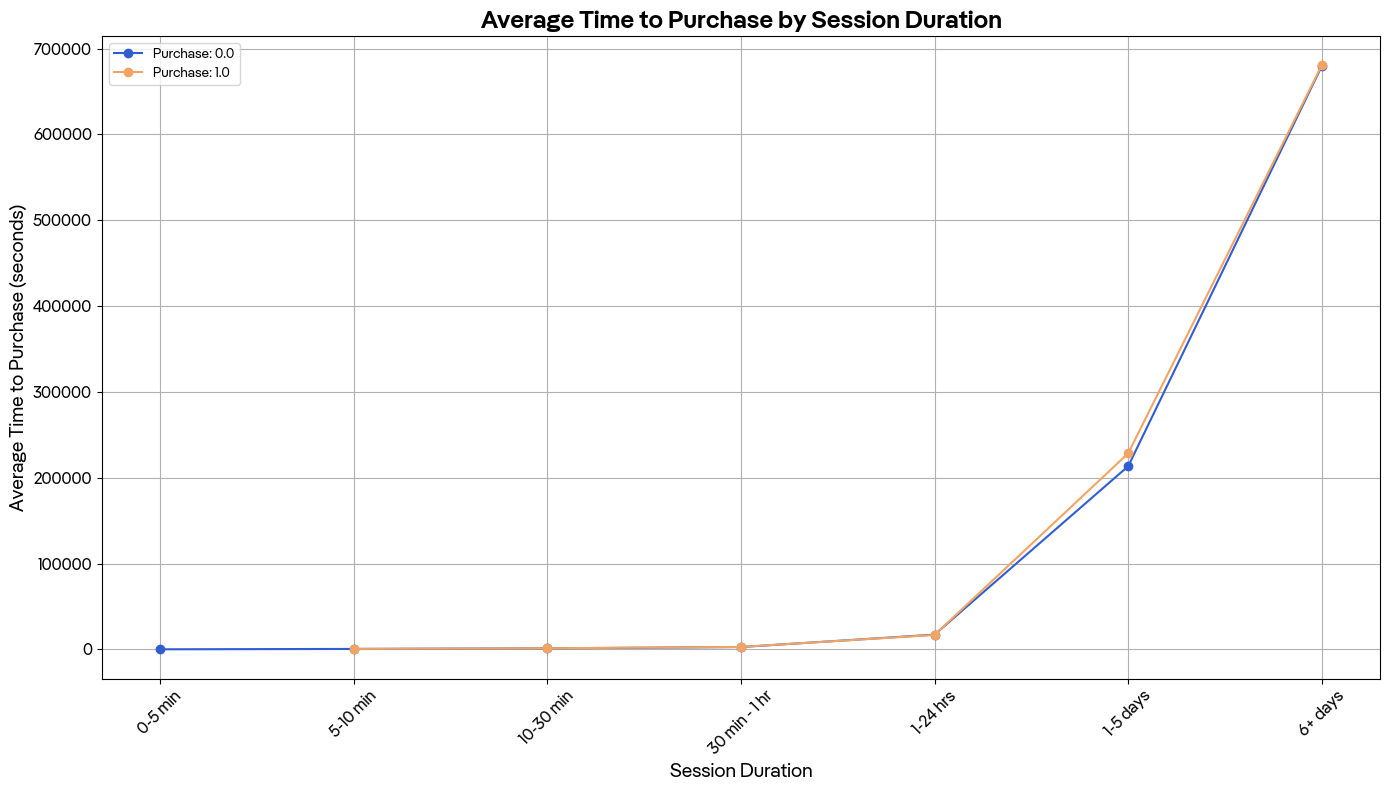

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Convert timestamp to datetime format
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])

# Calculate session duration and purchase status for each user session
session_data = analysis_df.groupby('user_session_id').apply(lambda x: pd.Series({
    'session_duration': (x['timestamp'].max() - x['timestamp'].min()).total_seconds(),
    'is_purchased': 1 if 1 in x['is_purchased'].values else 0
}))

# Create bins for session duration
bins = [0, 300, 600, 1800,3600, 86400, 432000, float('inf')]
labels = ['0-5 min', '5-10 min', '10-30 min', '30 min - 1 hr','1-24 hrs', '1-5 days', '6+ days']
# Assign bins to session duration
session_data['duration_bin'] = pd.cut(session_data['session_duration'], bins=bins, labels=labels, right=False)

# Calculate average time to purchase for each duration bin and purchase status
avg_time_to_purchase = session_data.groupby(['duration_bin', 'is_purchased'])['session_duration'].mean().unstack()

# Set font paths and properties
font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_prop = font_manager.FontProperties(fname=font_path)
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"
font_bold_prop = font_manager.FontProperties(fname=font_bold_path)

# Set colors
colors = ['#305DD0', '#F4A462', '#F4A462', '#E76E50', '#FAC658']

# Create a line chart
plt.figure(figsize=(14, 8))
for i, column in enumerate(avg_time_to_purchase.columns):
    plt.plot(avg_time_to_purchase.index, avg_time_to_purchase[column], marker='o', label=f'Purchase: {column}', color=colors[i % len(colors)])

plt.xlabel('Session Duration', fontproperties=font_bold_prop, fontsize=14)
plt.ylabel('Average Time to Purchase (seconds)', fontproperties=font_bold_prop, fontsize=14)
plt.title('Average Time to Purchase by Session Duration', fontproperties=font_prop, fontsize=18)
plt.legend(prop=font_bold_prop)
plt.grid(True)
plt.xticks(rotation=45, fontproperties=font_bold_prop, fontsize=12)
plt.yticks(fontproperties=font_bold_prop, fontsize=12)
plt.tight_layout()

# Save the graph as an SVG file
plt.savefig('avg_time_to_purchase.svg', format='svg')
plt.show()

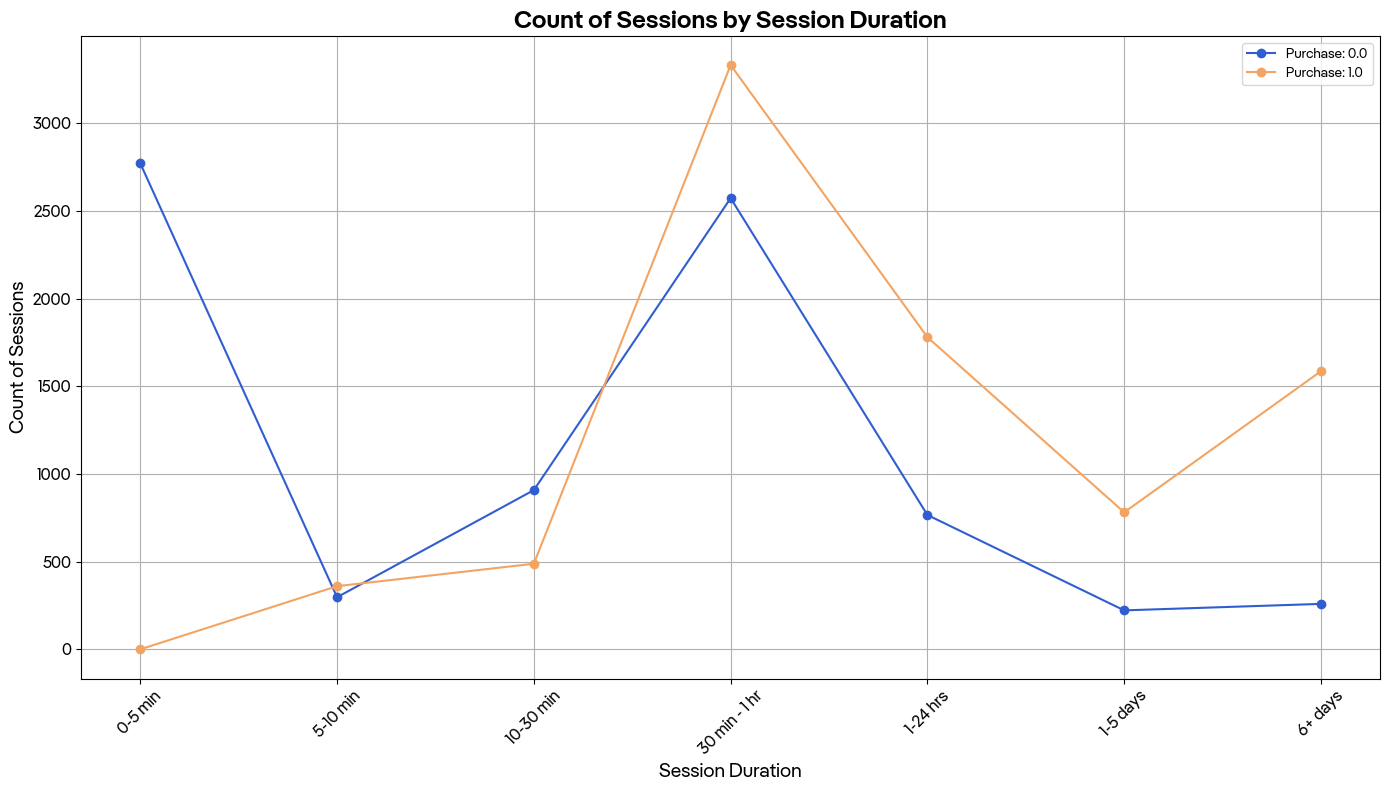

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Convert timestamp to datetime format
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])

# Calculate session duration and purchase status for each user session
session_data = analysis_df.groupby('user_session_id').apply(lambda x: pd.Series({
    'session_duration': (x['timestamp'].max() - x['timestamp'].min()).total_seconds(),
    'is_purchased': 1 if 1 in x['is_purchased'].values else 0
}))

# Create bins for session duration
bins = [0, 300, 600, 1800, 3600, 86400, 432000, float('inf')]
labels = ['0-5 min', '5-10 min', '10-30 min', '30 min - 1 hr', '1-24 hrs', '1-5 days', '6+ days']

# Assign bins to session duration
session_data['duration_bin'] = pd.cut(session_data['session_duration'], bins=bins, labels=labels, right=False)

# Calculate the count of sessions for each duration bin and purchase status
session_count = session_data.groupby(['duration_bin', 'is_purchased']).size().unstack()

# Set font paths and properties
font_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-SemiBold.otf"
font_prop = font_manager.FontProperties(fname=font_path)
font_bold_path = "/Users/behemoth/Desktop/Imperial/hso ---/workspace/Pangea-Regular.otf"
font_bold_prop = font_manager.FontProperties(fname=font_bold_path)

# Set colors
colors = ['#305DD0', '#F4A462', '#F4A462', '#E76E50', '#FAC658']

# Create a line chart
plt.figure(figsize=(14, 8))
for i, column in enumerate(session_count.columns):
    plt.plot(session_count.index, session_count[column], marker='o', label=f'Purchase: {column}', color=colors[i % len(colors)])

plt.xlabel('Session Duration', fontproperties=font_bold_prop, fontsize=14)
plt.ylabel('Count of Sessions', fontproperties=font_bold_prop, fontsize=14)
plt.title('Count of Sessions by Session Duration', fontproperties=font_prop, fontsize=18)
plt.legend(prop=font_bold_prop)
plt.grid(True)
plt.xticks(rotation=45, fontproperties=font_bold_prop, fontsize=12)
plt.yticks(fontproperties=font_bold_prop, fontsize=12)
plt.tight_layout()

# Save the graph as an SVG file
plt.savefig('session_count_by_duration.svg', format='svg')
plt.show()

In [430]:
analysis_df

,clickstream_id,timestamp,IP_address,is_purchased,is_page_errored,user_session_id,city,state,country,category,full_url,visit_order
0,1330588819,2012-03-01 00:00:19,147.222.227.200,0,0,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/,1
1,1330588825,2012-03-01 00:00:25,99.49.96.163,0,1,C9183A22-6E1D-4147-BDC9-D634FC957098,detroit,mi,usa,product,http://www.RL.com/product/4004,1
2,1330588827,2012-03-01 00:00:27,147.222.227.200,0,0,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/,2
3,1330588857,2012-03-01 00:00:57,69.114.3.205,0,0,F761B842-9DDA-42CC-9F28-A6359B6C7219,east northport,ny,usa,product,http://www.RL.com/product/4004,1
4,1330588859,2012-03-01 00:00:59,71.217.29.209,0,0,6FE1CB72-95C9-47F9-A1CB-7295C927F916,tacoma,wa,usa,customer review,http://www.RL.com/review/3004,1
...,...,...,...,...,...,...,...,...,...,...,...,...
421161,1331880560,2012-03-15 23:57:20,72.201.214.207,1,0,CA02C70D-7A65-9207-5F1F-A20B41F87C29,tempe,az,usa,purchase,http://www.RL.com/product/4004,16
421166,1331880583,2012-03-15 23:57:43,108.70.157.217,1,0,201F4108-A7D3-4C96-9B0F-4FFB8342DCD4,mira loma,ca,usa,purchase,http://www.RL.com/product/4002,19
421190,1331880776,2012-03-16 00:00:56,24.2.51.167,1,0,C0261CA0-8BFF-4C5E-8ABB-56E4E310B580,davis,ca,usa,purchase,http://www.RL.com/product/4002,9
421214,1331880866,2012-03-16 00:02:26,216.235.155.2,1,0,A30C1420-DF86-DABF-50CA-F490E9338E95,roswell,ga,usa,purchase,http://www.RL.com/product/4004,14


In [447]:
analysis_df.head()

,clickstream_id,timestamp,IP_address,is_purchased,is_page_errored,user_session_id,city,state,country,category,full_url,visit_order,product,review_type
0,1330588819,2012-03-01 00:00:19,147.222.227.200,0,0,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/,1,NaN,Other
1,1330588825,2012-03-01 00:00:25,99.49.96.163,0,1,C9183A22-6E1D-4147-BDC9-D634FC957098,detroit,mi,usa,product,http://www.RL.com/product/4004,1,NaN,Other
2,1330588827,2012-03-01 00:00:27,147.222.227.200,0,0,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/,2,NaN,Other
3,1330588857,2012-03-01 00:00:57,69.114.3.205,0,0,F761B842-9DDA-42CC-9F28-A6359B6C7219,east northport,ny,usa,product,http://www.RL.com/product/4004,1,NaN,Other
4,1330588859,2012-03-01 00:00:59,71.217.29.209,0,0,6FE1CB72-95C9-47F9-A1CB-7295C927F916,tacoma,wa,usa,customer review,http://www.RL.com/review/3004,1,NaN,Other


In [456]:
import pandas as pd

# Assuming your clickstream data is stored in a DataFrame called 'analysis_df'
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])

# Extract product information from the URL
analysis_df['product'] = analysis_df['full_url'].str.extract('(\d+)$')

# Define the review types based on the URL
def get_review_type(url):
    if 'celebrity review' in url:
        return 'Celebrity Review'
    elif 'customer review' in url:
        return 'Customer Review'
    elif 'video review' in url:
        return 'Video Review'
    else:
        return 'Other'

analysis_df['review_type'] = analysis_df['category'].apply(get_review_type)

# Sort the data by user session and timestamp
analysis_df = analysis_df.sort_values(['user_session_id', 'timestamp'])

# Create a new column to identify the page prior to purchase
analysis_df['prior_to_purchase'] = analysis_df.groupby('user_session_id')['is_purchased'].shift(1)

# Filter the data to include only the rows prior to purchase
prior_to_purchase_data = analysis_df[analysis_df['prior_to_purchase'] == 0]

# Group the data by product and review type to calculate the attributed revenue
attributed_revenue = prior_to_purchase_data.groupby([ 'review_type'])['product'].count()

# Print the attributed revenue for each review type
print("Last-Click Attribution:")
print(attributed_revenue)
prior_to_purchase_data

Last-Click Attribution:
review_type
Customer Review     62585
Other              149975
Video Review        38710
Name: product, dtype: int64


,clickstream_id,timestamp,IP_address,is_purchased,is_page_errored,user_session_id,city,state,country,category,full_url,visit_order,product,review_type,prior_to_purchase
319396,1331610161,2012-03-12 20:42:41,76.166.167.172,0,0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,oxnard,ca,usa,customer review,http://www.RL.com/review/3005,2,3005,Customer Review,0.0
319425,1331610177,2012-03-12 20:42:57,76.166.167.172,1,0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,oxnard,ca,usa,product,http://www.RL.com/product/4004,3,4004,Other,0.0
319552,1331610261,2012-03-12 20:44:21,76.166.167.172,0,0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,oxnard,ca,usa,product,http://www.RL.com/product/4005,5,4005,Other,0.0
319612,1331610308,2012-03-12 20:45:08,76.166.167.172,0,0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,oxnard,ca,usa,product,http://www.RL.com/product/4002,6,4002,Other,0.0
319743,1331610404,2012-03-12 20:46:44,76.166.167.172,0,0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,oxnard,ca,usa,home page,http://www.RL.com/,7,NaN,Other,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372004,1331706756,2012-03-13 23:32:36,107.5.194.91,0,0,FFFB1C5E-37B6-453A-83FB-86C580D18AE8,ann arbor,mi,usa,home page,http://www.RL.com/,47,NaN,Other,0.0
372005,1331706756,2012-03-13 23:32:36,107.5.194.91,0,0,FFFB1C5E-37B6-453A-83FB-86C580D18AE8,ann arbor,mi,usa,home page,http://www.RL.com/,48,NaN,Other,0.0
372086,1331707061,2012-03-13 23:37:41,107.5.194.91,1,0,FFFB1C5E-37B6-453A-83FB-86C580D18AE8,ann arbor,mi,usa,product,http://www.RL.com/product/4004,49,4004,Other,0.0
372106,1331707154,2012-03-13 23:39:14,107.5.194.91,0,0,FFFB1C5E-37B6-453A-83FB-86C580D18AE8,ann arbor,mi,usa,home page,http://www.RL.com/,51,NaN,Other,0.0


## attribution model 

In [521]:

purchased_data = analysis_df[analysis_df['is_purchased'] == 1]
purchased_data.head()

,clickstream_id,timestamp,IP_address,is_purchased,is_page_errored,user_session_id,city,state,country,category,full_url,visit_order
26,1330589097,2012-03-01 00:04:57,24.9.63.79,1,0,DEADBDB9-274E-4119-8184-DA17A059D6CE,boulder,co,usa,product,http://www.RL.com/product/4004,3
104,1330589800,2012-03-01 00:16:40,68.52.198.113,1,0,DA55421E-31B5-45E5-9542-1E31B575E5CC,nashville,tn,usa,product,http://www.RL.com/product/4001,6
129,1330590026,2012-03-01 00:20:26,71.202.183.76,1,0,20A5F11F-EEAD-4662-B50D-8D1C7C871305,berkeley,ca,usa,product,http://www.RL.com/product/4003,8
130,1330590026,2012-03-01 00:20:26,71.202.183.76,1,0,20A5F11F-EEAD-4662-B50D-8D1C7C871305,berkeley,ca,usa,product,http://www.RL.com/product/4004,9
136,1330590074,2012-03-01 00:21:14,70.187.162.17,1,0,88FC5287-907D-48FF-82A3-134F2EBC6351,irvine,ca,usa,product,http://www.RL.com/product/4001,8


In [522]:
rest_of_data = analysis_df[analysis_df['is_purchased'] == 0]
rest_of_data.head()

,clickstream_id,timestamp,IP_address,is_purchased,is_page_errored,user_session_id,city,state,country,category,full_url,visit_order
0,1330588819,2012-03-01 00:00:19,147.222.227.200,0,0,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/,1
1,1330588825,2012-03-01 00:00:25,99.49.96.163,0,1,C9183A22-6E1D-4147-BDC9-D634FC957098,detroit,mi,usa,product,http://www.RL.com/product/4004,1
2,1330588827,2012-03-01 00:00:27,147.222.227.200,0,0,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa,home page,http://www.RL.com/,2
3,1330588857,2012-03-01 00:00:57,69.114.3.205,0,0,F761B842-9DDA-42CC-9F28-A6359B6C7219,east northport,ny,usa,product,http://www.RL.com/product/4004,1
4,1330588859,2012-03-01 00:00:59,71.217.29.209,0,0,6FE1CB72-95C9-47F9-A1CB-7295C927F916,tacoma,wa,usa,customer review,http://www.RL.com/review/3004,1


In [523]:
purchased_data['previous_visit_order'] = purchased_data['visit_order'] - 1

# Merge purchased_data with rest_of_data on 'user_session_id' and 'visit_order' and 'previous_visit_order'
merged_data = pd.merge(
    purchased_data,
    rest_of_data,
    left_on=['user_session_id', 'previous_visit_order'],
    right_on=['user_session_id', 'visit_order'],
    suffixes=('_purchase', '_rest')
)


In [524]:
import pandas as pd

# Define the review types based on the URL
def get_review_type(url):
    if 'celebrity' in url:
        return 'Celebrity Review'
    elif 'customer' in url:
        return 'Customer Review'
    elif 'video' in url:
        return 'Video Review'
    elif 'home page' in url:
        return 'Home Page'
    else:
        return 'Other'
# Extract product information from the URL
merged_data['product'] = merged_data['full_url_purchase'].str.extract('(\d+)$')

merged_data['review_type'] = merged_data['category_rest'].apply(get_review_type)
merged_data.head()

,clickstream_id_purchase,timestamp_purchase,IP_address_purchase,is_purchased_purchase,is_page_errored_purchase,user_session_id,city_purchase,state_purchase,country_purchase,category_purchase,...,is_purchased_rest,is_page_errored_rest,city_rest,state_rest,country_rest,category_rest,full_url_rest,visit_order_rest,product,review_type
0,1330589097,2012-03-01 00:04:57,24.9.63.79,1,0,DEADBDB9-274E-4119-8184-DA17A059D6CE,boulder,co,usa,product,...,0,0,boulder,co,usa,home page,http://www.RL.com/,2,4004,Home Page
1,1330589800,2012-03-01 00:16:40,68.52.198.113,1,0,DA55421E-31B5-45E5-9542-1E31B575E5CC,nashville,tn,usa,product,...,0,0,nashville,tn,usa,home page,http://www.RL.com/,5,4001,Home Page
2,1330590026,2012-03-01 00:20:26,71.202.183.76,1,0,20A5F11F-EEAD-4662-B50D-8D1C7C871305,berkeley,ca,usa,product,...,0,0,berkeley,ca,usa,video review,http://www.RL.com/video/1003,7,4003,Video Review
3,1330590074,2012-03-01 00:21:14,70.187.162.17,1,0,88FC5287-907D-48FF-82A3-134F2EBC6351,irvine,ca,usa,product,...,0,0,irvine,ca,usa,video review,http://www.RL.com/video/1002,7,4001,Video Review
4,1330591256,2012-03-01 00:40:56,70.173.86.149,1,0,302EE2C5-D27D-4A2A-B94C-BA22EAD6A373,las vegas,nv,usa,product,...,0,0,las vegas,nv,usa,home page,http://www.RL.com/,5,4004,Home Page


In [525]:

# Group the data by review type and product code to calculate the conversion rate
conversion_data = merged_data.groupby(['review_type', 'product']).agg({
    'user_session_id': 'nunique',
    'is_purchased_purchase': 'sum'
}).reset_index()
conversion_data.to_csv('last_click.csv')

In [526]:

# Group by 'review_type' and 'product', summing the sessions and purchases
summary = conversion_data.groupby(['review_type', 'product']).sum().reset_index()
# Calculate the conversion rate
summary['conversion_rate'] = (summary['is_purchased_purchase'] / 15061)

# Pivot the data to have 'review_type' as columns, 'product' as index, and 'conversion_rate' as values
pivot_table = summary.pivot(index='product', columns='review_type', values='conversion_rate')

# Display the pivot table
pivot_table

review_type,Celebrity Review,Customer Review,Home Page,Other,Video Review
product,,,,,
4001,0.011155,0.033132,0.091760,0.049997,0.019786
4002,0.010889,0.030011,0.082730,0.061682,0.019853
4003,0.011088,0.031804,0.079410,0.057699,0.019122
4004,0.011287,0.029613,0.077750,0.060023,0.018790
4005,0.010026,0.028883,0.076024,0.059956,0.017529


In [517]:

conversion_data = conversion_data.rename(columns={
    'user_session_id': 'total_sessions',
    'is_purchased_purchase': 'total_purchases'
})

conversion_data['conversion_rate'] = conversion_data['total_purchases'] / conversion_data['total_sessions'] * 100

# Pivot the data to create a table similar to the image
pivot_table = conversion_data.pivot(index='product', columns='review_type', values='conversion_rate')
pivot_table = pivot_table.reset_index()

print("Conversion Rate by Product and Review Type:")
print(pivot_table)

Conversion Rate by Product and Review Type:
review_type product  Celebrity Review  Customer Review   Home Page  \
0              4001        101.818182       103.312629  109.769658   
1              4002        101.863354       103.908046  107.878788   
2              4003        100.000000       103.010753  107.747748   
3              4004        100.000000       102.059497  106.551410   
4              4005        101.342282       101.635514  105.822551   

review_type       Other  Video Review  
0            105.610098    100.675676  
1            107.274827    101.700680  
2            105.078597    102.127660  
3            104.387991    102.909091  
4            105.122235    100.763359  


In [519]:
# Calculate the time difference between each click and the purchase
merged_data['time_diff'] = (merged_data['timestamp_purchase'] - merged_data['timestamp_rest']).dt.total_seconds()

# Define the half-life for time decay (in seconds)
half_life = 3600  # 1 hour

# Calculate the time decay weight for each click
merged_data['time_decay_weight'] = 0.5 ** (merged_data['time_diff'] / half_life)

# Group the data by review type and product to calculate the attributed conversions
attributed_conversions = merged_data.groupby(['review_type', 'product']).agg({
    'time_decay_weight': 'sum',
    'is_purchased_purchase': 'sum'
}).reset_index()

attributed_conversions

,review_type,product,time_decay_weight,is_purchased_purchase
0,Celebrity Review,4001,159.557801,168
1,Celebrity Review,4002,153.833782,164
2,Celebrity Review,4003,163.068406,167
3,Celebrity Review,4004,162.233920,170
4,Celebrity Review,4005,142.424663,151
5,Customer Review,4001,482.273018,499
6,Customer Review,4002,432.298926,452
7,Customer Review,4003,458.216415,479
8,Customer Review,4004,424.386529,446
9,Customer Review,4005,414.255858,435


In [531]:
# Rename columns for clarity
attributed_conversions = attributed_conversions.rename(columns={
    'time_decay_weight': 'attributed_conversions',
    'is_purchased_purchase': 'total_conversions'
})

# Calculate the attribution percentage for each review type and product
attributed_conversions['attribution_percentage'] = attributed_conversions['attributed_conversions'] / 15061

# Pivot the data to create a table similar to the image
pivot_table = attributed_conversions.pivot(index='product', columns='review_type', values='attribution_percentage')
pivot_table = pivot_table.reset_index()

print("Time Decay Attribution by Product and Review Type:")
pivot_table

Time Decay Attribution by Product and Review Type:


review_type,product,Celebrity Review,Customer Review,Home Page,Other,Video Review
0,4001,0.010594,0.032021,0.087977,0.048249,0.018856
1,4002,0.010214,0.028703,0.079277,0.059212,0.019124
2,4003,0.010827,0.030424,0.076031,0.055947,0.018413
3,4004,0.010772,0.028178,0.074022,0.058233,0.017903
4,4005,0.009457,0.027505,0.072695,0.058041,0.016503


### Shapley method

In [94]:
## Create customer path
paths_df = analysis_df.groupby('user_session_id')['category'].aggregate(
    lambda x: x.unique().tolist()).reset_index()

In [95]:
## Merge both DFs
last_interaction_df = analysis_df.drop_duplicates('user_session_id', keep = 'last')[['user_session_id', 'is_purchased']]

paths_df = pd.merge(paths_df, last_interaction_df, how = 'left', on = 'user_session_id')

In [96]:
## Add start and end to journey
paths_df['paths'] = np.where(
    paths_df['is_purchased'] == 0, 
    ['Start,'] + paths_df['category'].apply(','.join) + [',Null'],
    ['Start,'] + paths_df['category'].apply(','.join) + [',Purchase'])

paths_df['paths'] = paths_df['paths'].str.split(',')

In [97]:
## Save to .csv
paths_df.to_csv('customer_journey.csv')
paths_df.head()

# Filter out 'home page' and 'product' values from the paths_df
paths_df['paths'] = paths_df['paths'].apply(lambda x: [item for item in x if item not in ['product', 'home page', 'Null', 'Home Page']])
paths_df['category'] = paths_df['category'].apply(lambda x: [item for item in x if item not in ['product', 'home page' ,'Null', 'Home Page']])

paths_df

,user_session_id,category,is_purchased,paths
0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,"[celebrity recommendation, customer review]",0,"[Start, celebrity recommendation, customer rev..."
1,000B90B2-92DC-4A7A-8B90-B292DC9A7A71,[celebrity recommendation],0,"[Start, celebrity recommendation]"
2,000C47AD-EBFC-CDB8-CF70-DC4C2ED5051B,"[customer review, video review, celebrity reco...",0,"[Start, customer review, video review, celebri..."
3,000E15BA-EB3E-14A6-4921-0E24C052821D,"[video review, customer review]",0,"[Start, video review, customer review]"
4,000EE247-7758-E6B7-68D3-ACE8445BCD43,"[customer review, video review]",0,"[Start, customer review, video review]"
...,...,...,...,...
16118,FFF1BD4A-82B8-F6A6-C6D7-07914E229B02,[customer review],0,"[Start, customer review]"
16119,FFF3EEA6-1A7A-4BF6-8C8E-84BBC530AD34,"[customer review, celebrity recommendation, vi...",0,"[Start, customer review, celebrity recommendat..."
16120,FFF47F68-28C7-4088-ADAE-BD09C695A448,"[customer review, celebrity recommendation, vi...",0,"[Start, customer review, celebrity recommendat..."
16121,FFF9E6CB-D3A2-455F-B5CF-6B8EC4E80ABE,"[video review, customer review, celebrity reco...",0,"[Start, video review, customer review, celebri..."


In [65]:
from itertools import combinations
from collections import defaultdict
from itertools import combinations
from collections import defaultdict
from scipy.special import comb

# Define the value function
def value_function(subset, data):
    if not subset:
        return 0
    relevant_paths = data[data['paths'].apply(lambda x: set(subset).issubset(set(x)))]
    if relevant_paths.empty:
        return 0
    conversion_rate = relevant_paths['is_purchased'].mean()
    return conversion_rate

# Extract unique categories
categories = list(set(analysis_df['category']) - {'product', 'Null'})

# Initialize Shapley values dictionary
shapley_values = defaultdict(float)

# Total number of categories
n = len(categories)

# Calculate Shapley values
for category in categories:
    for k in range(n):
        subsets = list(combinations([c for c in categories if c != category], k))
        for subset in subsets:
            subset_with = list(subset) + [category]
            contribution = (value_function(subset_with, paths_df) - value_function(subset, paths_df)) / (n * comb(n - 1, k))
            shapley_values[category] += contribution

# Convert to DataFrame for better readability
shapley_df = pd.DataFrame.from_dict(shapley_values, orient='index', columns=['Shapley Value'])
shapley_df.sort_values(by='Shapley Value', ascending=False, inplace=True)
print(shapley_df)



                          Shapley Value
customer review                0.008374
celebrity recommendation       0.008299
video review                   0.007829
home page                     -0.024502


In [66]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import defaultdict
from scipy.special import comb

# Assuming analysis_df is already defined and loaded

# Create customer path
paths_df = analysis_df.groupby('user_session_id')['category'].aggregate(
    lambda x: x.unique().tolist()).reset_index()

# Merge both DFs
last_interaction_df = analysis_df.drop_duplicates('user_session_id', keep='last')[['user_session_id', 'is_purchased']]
paths_df = pd.merge(paths_df, last_interaction_df, how='left', on='user_session_id')

# Add start and end to journey
paths_df['paths'] = np.where(
    paths_df['is_purchased'] == 0, 
    ['Start,'] + paths_df['category'].apply(','.join) + [',Null'],
    ['Start,'] + paths_df['category'].apply(','.join) + [',Purchase']
)
paths_df['paths'] = paths_df['paths'].str.split(',')

# Filter out 'home page', 'product', and 'Null' values from the paths_df
filter_out = ['home page', 'product']
paths_df['paths'] = paths_df['paths'].apply(lambda x: [item for item in x if item not in filter_out])
paths_df['category'] = paths_df['category'].apply(lambda x: [item for item in x if item not in filter_out])

# Save to .csv
paths_df.to_csv('customer_journey.csv')
paths_df.head()

# Define the value function
def value_function(subset, data):
    if not subset:
        return 0
    relevant_paths = data[data['paths'].apply(lambda x: set(subset).issubset(set(x)))]
    if relevant_paths.empty:
        return 0
    conversion_rate = relevant_paths['is_purchased'].mean()
    return conversion_rate

# Extract unique categories, excluding 'home page', 'product', and 'Null'
categories = list(set(analysis_df['category']) - set(filter_out))

# Initialize Shapley values dictionary
shapley_values = defaultdict(float)

# Total number of categories
n = len(categories)

# Calculate Shapley values
for category in categories:
    for k in range(n):
        subsets = list(combinations([c for c in categories if c != category], k))
        for subset in subsets:
            subset_with = list(subset) + [category]
            contribution = (value_function(subset_with, paths_df) - value_function(subset, paths_df)) / (n * comb(n - 1, k))
            shapley_values[category] += contribution

# Convert to DataFrame for better readability
shapley_df = pd.DataFrame.from_dict(shapley_values, orient='index', columns=['Shapley Value'])
shapley_df.sort_values(by='Shapley Value', ascending=False, inplace=True)
print(shapley_df)


                          Shapley Value
customer review                0.011297
celebrity recommendation       0.010992
video review                   0.010132


In [68]:
pip install markovclick

  Obtaining dependency information for markovclick from https://files.pythonhosted.org/packages/4a/09/d02be913dad4b9aab33f08b82db61dcf51162f98f8487c79b7cc4f09fd79/markovclick-0.1.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [70]:
from markovclick.models import MarkovClickstream

# Assuming your clickstream data is stored in a variable called 'clickstream'
m = MarkovClickstream(clickstream)

In [89]:
from markovclick.viz import visualise_markov_chain

graph = visualise_markov_chain(m)

graph.render('markov_chain', format='svg')


'markov_chain.svg'

In [84]:
from markovclick.preprocessing import Sessionise

# Initialize the sessionizer
sessioniser = Sessionise(analysis_df, 
                         unique_id_col='user_session_id', 
                         datetime_col='timestamp', 
                         session_timeout=30)

# Assign sessions
sess_df = sessioniser.assign_sessions(n_jobs=2)

/Users/behemoth/anaconda3/lib/python3.11/site-packages/markovclick/preprocessing.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'session_uuid'] = _df.apply(
/Users/behemoth/anaconda3/lib/python3.11/site-packages/markovclick/preprocessing.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'session_uuid'] = _df.apply(


In [85]:
# Group by session and create a list of URLs for each session
df_grouped = sess_df.groupby('session_uuid')['category'].apply(list)

In [86]:
from markovclick.models import MarkovClickstream

# Initialize the MarkovClickstream model
m = MarkovClickstream(df_grouped)


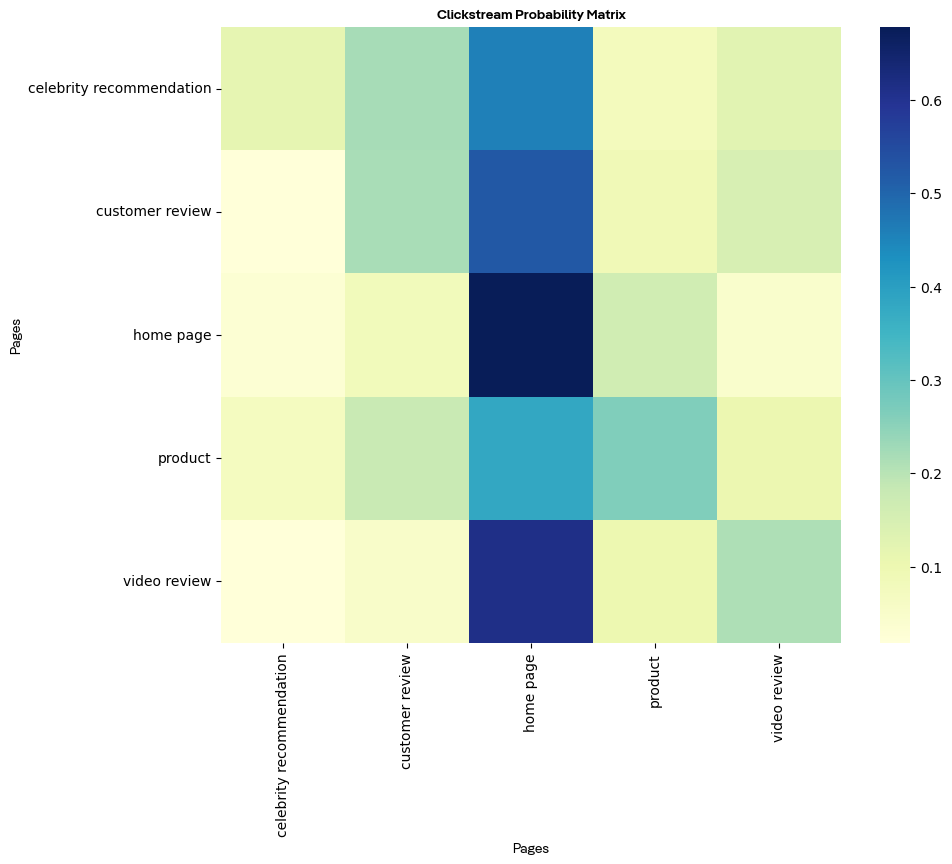

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the probability matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages, cmap="YlGnBu")
plt.title("Clickstream Probability Matrix", fontsize=14, fontproperties=font_prop)
plt.xlabel("Pages", fontproperties=font_bold_prop)
plt.ylabel("Pages", fontproperties=font_bold_prop)
plt.savefig('probmatrix.svg', format='svg', bbox_inches='tight')


In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Filter out 'home page' and 'product' values from the paths_df
paths_df['paths'] = paths_df['paths'].apply(lambda x: [item for item in x if item not in ['product', 'home page', 'Null', 'Home Page']])
paths_df['category'] = paths_df['category'].apply(lambda x: [item for item in x if item not in ['product', 'home page', 'Null', 'Home Page']])

# Create dummy variables for each review type
paths_df['customer_review'] = paths_df['category'].apply(lambda x: 1 if 'customer review' in x else 0)
paths_df['video_review'] = paths_df['category'].apply(lambda x: 1 if 'video review' in x else 0)
paths_df['celebrity_recommendation'] = paths_df['category'].apply(lambda x: 1 if 'celebrity recommendation' in x else 0)
paths_df

,user_session_id,category,is_purchased,paths,customer_review,video_review,celebrity_recommendation
0,0001BDD9-EABF-4D0D-81BD-D9EABFCD0D7D,"[celebrity recommendation, customer review]",0,"[Start, celebrity recommendation, customer rev...",1,0,1
1,000B90B2-92DC-4A7A-8B90-B292DC9A7A71,[celebrity recommendation],0,"[Start, celebrity recommendation]",0,0,1
2,000C47AD-EBFC-CDB8-CF70-DC4C2ED5051B,"[customer review, video review, celebrity reco...",0,"[Start, customer review, video review, celebri...",1,1,1
3,000E15BA-EB3E-14A6-4921-0E24C052821D,"[video review, customer review]",0,"[Start, video review, customer review]",1,1,0
4,000EE247-7758-E6B7-68D3-ACE8445BCD43,"[customer review, video review]",0,"[Start, customer review, video review]",1,1,0
...,...,...,...,...,...,...,...
16118,FFF1BD4A-82B8-F6A6-C6D7-07914E229B02,[customer review],0,"[Start, customer review]",1,0,0
16119,FFF3EEA6-1A7A-4BF6-8C8E-84BBC530AD34,"[customer review, celebrity recommendation, vi...",0,"[Start, customer review, celebrity recommendat...",1,1,1
16120,FFF47F68-28C7-4088-ADAE-BD09C695A448,"[customer review, celebrity recommendation, vi...",0,"[Start, customer review, celebrity recommendat...",1,1,1
16121,FFF9E6CB-D3A2-455F-B5CF-6B8EC4E80ABE,"[video review, customer review, celebrity reco...",0,"[Start, video review, customer review, celebri...",1,1,1


In [101]:
# Prepare the features (X) and target variable (y)
X = paths_df[['customer_review', 'video_review', 'celebrity_recommendation']]
y = paths_df['is_purchased']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Coefficients:")
print("Customer Review:", model.coef_[0])
print("Video Review:", model.coef_[1])
print("Celebrity Recommendation:", model.coef_[2])

Coefficients:
Customer Review: -0.008416837228460664
Video Review: -0.008925632340668255
Celebrity Recommendation: 1.812343177020042e-05


In [119]:
import pandas as pd
import statsmodels.api as sm
analysis_df['timestamp'] = pd.to_datetime(analysis_df['timestamp'])

# Create flags for each category of interest
analysis_df['celebrity_recommendation'] = analysis_df['category'].str.contains('celebrity', case=False, na=False).astype(int)
analysis_df['video_review'] = analysis_df['category'].str.contains('video review', case=False, na=False).astype(int)
analysis_df['customer_review'] = analysis_df['category'].str.contains('customer review', case=False, na=False).astype(int)

# Aggregate by user session to see if a purchase was made and which categories were present
session_summary = analysis_df.groupby('user_session_id').agg(
    is_purchased=('is_purchased', 'max'),
    celebrity_recommendation=('celebrity_recommendation', 'max'),
    video_review=('video_review', 'max'),
    customer_review=('customer_review', 'max')
).reset_index()

X = session_summary[['celebrity_recommendation', 'video_review', 'customer_review']]
y = session_summary['is_purchased']

# Add a constant to the features matrix (for the intercept)
model = LinearRegression()
model.fit(X, y)

print("Coefficients:")
print("Celebrity Recommendation:", model.coef_[0])
print("Video Review:", model.coef_[1])
print("Customer Review:", model.coef_[2])


Coefficients:
Celebrity Recommendation: 0.2043724062548454
Video Review: 0.22183406290772417
Customer Review: 0.2264337782022065


In [123]:
# Create flags for each category of interest
analysis_df['celebrity_recommendation'] = analysis_df['category'].str.contains('celebrity', case=False, na=False).astype(int)
analysis_df['video_review'] = analysis_df['category'].str.contains('video review', case=False, na=False).astype(int)
analysis_df['customer_review'] = analysis_df['category'].str.contains('customer review', case=False, na=False).astype(int)

# Aggregate by user session to see if a purchase was made and sum the occurrences of each category
session_summary = analysis_df.groupby('user_session_id').agg(
    is_purchased=('is_purchased', 'max'),
    celebrity_recommendation=('celebrity_recommendation', 'sum'),
    video_review=('video_review', 'sum'),
    customer_review=('customer_review', 'sum')
).reset_index()

X = session_summary[['celebrity_recommendation', 'video_review', 'customer_review']]
y = session_summary['is_purchased']

# Add a constant to the features matrix (for the intercept)
model = LinearRegression()
model.fit(X, y)

print("Coefficients:")
print("Intercept:", model.intercept_)
print("Celebrity Recommendation:", model.coef_[0])
print("Video Review:", model.coef_[1])
print("Customer Review:", model.coef_[2])

Coefficients:
Intercept: 0.3176782348645294
Celebrity Recommendation: 0.028222680069134518
Video Review: 0.010811329446848681
Customer Review: 0.02897668549827549
